## Plotting DE's
$$\ddot{x} = -x -ax^b$$
$$0<a\leq0.5$$
$$1\leq b \leq 5$$

In [13]:
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
import numpy as np
from pyvbmc import VBMC 
from pyvbmc.priors import UniformBox, Trapezoidal, SplineTrapezoidal, SmoothBox # nice priors from PyVBMC

# graph those with high probability 
#don't plot velocities, just position
#plot all on top of each other
#plot expected value and true value


In [14]:
a_min = 0.0
a_max = 0.5
b_min = 1.0
b_max = 5.0

In [21]:
a = 0.44
b = 1.89
x_true = sol[:,1]
def log_likelihood(theta):
    a,b = theta

    sol = odeint(diffyqs, initial_condition, t, args=(a,b)) # get solution of ODE with current choice of params
    
    return -np.sum((sol[:,1] - x_true)**2) # normal distribution sorta
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

x0 = np.full((1, D), 0.11) # starting point for inference   # 1.5 * np.ones((1, D))
x0[0][1] = 3.5

print(LB,PLB,PUB,UB,'x0:',x0)

prior1 = SplineTrapezoidal(LB, PLB, PUB, UB)
options1 = {
    "display": "off"
}

vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = prior1, options = options1) # initialize VMBC object

vp, results = vbmc.optimize() # do optimization (might take a while)


[[0. 1.]] [[0.05 1.05]] [[0.45 4.95]] [[0.5 5. ]] x0: [[0.11 3.5 ]]


/Users/annarittenhouse/anaconda3/envs/bpe/lib/python3.11/site-packages/cma/evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar subtract
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),
/Users/annarittenhouse/anaconda3/envs/bpe/lib/python3.11/site-packages/cma/evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar multiply
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),


Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -5.476 +/-0.000.


In [114]:
a = 0.33
b = 3.22
x_true2 = sol2[:,1]
def log_likelihood2(theta):
    a,b = theta

    sol2 = odeint(diffyqs, initial_condition, t, args=(a,b)) # get solution of ODE with current choice of params
    
    return -np.sum((sol2[:,1] - x_true2)**2) # normal distribution sorta
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

x0 = np.full((1, D), 0.11) # starting point for inference   # 1.5 * np.ones((1, D))
x0[0][1] = 3.5

print(LB,PLB,PUB,UB,'x0:',x0)

prior1 = SplineTrapezoidal(LB, PLB, PUB, UB)
vbmc2 = VBMC(log_likelihood2, x0, LB, UB, PLB, PUB, prior = prior1, options = options1) # initialize VMBC object

vp2, results2 = vbmc2.optimize() # do optimization (might take a while)

[[0. 1.]] [[0.05 1.05]] [[0.45 4.95]] [[0.5 5. ]] x0: [[0.11 3.5 ]]
Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -9.897 +/-0.001.


In [23]:
a = 0.5
b = 4.11
x_true3 = sol3[:,1]
def log_likelihood3(theta):
    a,b = theta

    sol3 = odeint(diffyqs, initial_condition, t, args=(a,b)) # get solution of ODE with current choice of params
    
    return -np.sum((sol3[:,1] - x_true3)**2) # normal distribution sorta
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

x0 = np.full((1, D), 0.11) # starting point for inference   # 1.5 * np.ones((1, D))
x0[0][1] = 3.5

print(LB,PLB,PUB,UB,'x0:',x0)

prior1 = SplineTrapezoidal(LB, PLB, PUB, UB)
vbmc3 = VBMC(log_likelihood3, x0, LB, UB, PLB, PUB, prior = prior1, options = options1) # initialize VMBC object

vp3, results3 = vbmc3.optimize() # do optimization (might take a while)

[[0. 1.]] [[0.05 1.05]] [[0.45 4.95]] [[0.5 5. ]] x0: [[0.11 3.5 ]]
Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -6.655 +/-0.000.


In [24]:
a = 0.22
b = 1.44
x_true4 = sol4[:,1]
def log_likelihood4(theta):
    a,b = theta

    sol4 = odeint(diffyqs, initial_condition, t, args=(a,b)) # get solution of ODE with current choice of params
    
    return -np.sum((sol4[:,1] - x_true4)**2) # normal distribution sorta
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

x0 = np.full((1, D), 0.11) # starting point for inference   # 1.5 * np.ones((1, D))
x0[0][1] = 3.5

print(LB,PLB,PUB,UB,'x0:',x0)

prior1 = SplineTrapezoidal(LB, PLB, PUB, UB)
vbmc4 = VBMC(log_likelihood4, x0, LB, UB, PLB, PUB, prior = prior1, options = options1) # initialize VMBC object

vp4, results4 = vbmc4.optimize() # do optimization (might take a while)

[[0. 1.]] [[0.05 1.05]] [[0.45 4.95]] [[0.5 5. ]] x0: [[0.11 3.5 ]]
Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -5.401 +/-0.001.


In [116]:
a = 0.25
b = 5.0
sol5 = odeint(diffyqs, initial_condition, t, args=(a,b))
x_true5 = sol5[:,1]
def log_likelihood5(theta):
    a,b = theta

    sol5 = odeint(diffyqs, initial_condition, t, args=(a,b)) # get solution of ODE with current choice of params
    
    return -np.sum((sol5[:,1] - x_true5)**2) # normal distribution sorta
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

x0 = np.full((1, D), 0.11) # starting point for inference   # 1.5 * np.ones((1, D))
x0[0][1] = 3.5

print(LB,PLB,PUB,UB,'x0:',x0)

prior1 = SplineTrapezoidal(LB, PLB, PUB, UB)
vbmc5 = VBMC(log_likelihood5, x0, LB, UB, PLB, PUB, prior = prior1, options = options1) # initialize VMBC object

vp5, results5 = vbmc5.optimize() # do optimization (might take a while)


[[0. 1.]] [[0.05 1.05]] [[0.45 4.95]] [[0.5 5. ]] x0: [[0.11 3.5 ]]
Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -6.442 +/-0.001.


In [181]:
a = 0.00
b = 2.78
sol6 = odeint(diffyqs, initial_condition, t, args=(a,b))
x_true6 = sol6[:,1]
def log_likelihood6(theta):
    a,b = theta

    sol6 = odeint(diffyqs, initial_condition, t, args=(a,b)) # get solution of ODE with current choice of params
    
    return -np.sum((sol6[:,1] - x_true6)**2) # normal distribution sorta
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

x0 = np.full((1, D), 0.11) # starting point for inference   # 1.5 * np.ones((1, D))
x0[0][1] = 3.5

print(LB,PLB,PUB,UB,'x0:',x0)

prior1 = SplineTrapezoidal(LB, PLB, PUB, UB)
vbmc6 = VBMC(log_likelihood6, x0, LB, UB, PLB, PUB, prior = prior1, options = options1) # initialize VMBC object

vp6, results6 = vbmc6.optimize() # do optimization (might take a while)

[[0. 1.]] [[0.05 1.05]] [[0.45 4.95]] [[0.5 5. ]] x0: [[0.11 3.5 ]]


/Users/annarittenhouse/anaconda3/envs/bpe/lib/python3.11/site-packages/cma/evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar subtract
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),
/Users/annarittenhouse/anaconda3/envs/bpe/lib/python3.11/site-packages/cma/evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar multiply
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),


Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -9.274 +/-0.002.


In [186]:
a = 0.5
b = 1.00
sol7 = odeint(diffyqs, initial_condition, t, args=(a,b))
x_true7 = sol7[:,1]
def log_likelihood7(theta):
    a,b = theta

    sol7 = odeint(diffyqs, initial_condition, t, args=(a,b)) # get solution of ODE with current choice of params
    
    return -np.sum((sol7[:,1] - x_true7)**2) # normal distribution sorta
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

x0 = np.full((1, D), 0.11) # starting point for inference   # 1.5 * np.ones((1, D))
x0[0][1] = 3.5

print(LB,PLB,PUB,UB,'x0:',x0)

prior1 = SplineTrapezoidal(LB, PLB, PUB, UB)
vbmc7 = VBMC(log_likelihood7, x0, LB, UB, PLB, PUB, prior = prior1, options = options1) # initialize VMBC object

vp7, results7 = vbmc7.optimize() # do optimization (might take a while)

[[0. 1.]] [[0.05 1.05]] [[0.45 4.95]] [[0.5 5. ]] x0: [[0.11 3.5 ]]


/Users/annarittenhouse/anaconda3/envs/bpe/lib/python3.11/site-packages/cma/evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar subtract
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),
/Users/annarittenhouse/anaconda3/envs/bpe/lib/python3.11/site-packages/cma/evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar multiply
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),


Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -5.401 +/-0.000.


[2.21770485] [0.33991119]


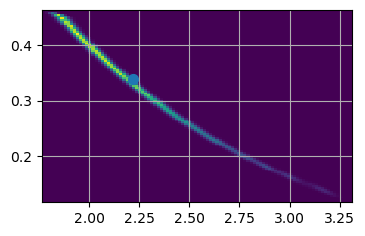

In [62]:
a = vp.moments()[:,1]
b = vp.moments()[:,0]

plt.figure(figsize=(4,2.5))
Xs, _ = vp.sample(int(5e5))
plt.hist2d(Xs[:,1], Xs[:,0], bins = 100)
plt.scatter(a, b, s = 50)
plt.grid()
# ax.grid(True)
# ax.grid(which = "major")
# ax.grid(which = "minor")
# ax.minorticks_on()
# make grid more fine
#plt.show()
#plt.plot(t, sol[:,0], label = '')

print(a, b)


In [226]:
print(vp.pdf([0.15, 2.5]))

[6.71172951e-152]


Text(0.5, 1.0, 'a = 0.44, b = 1.89')

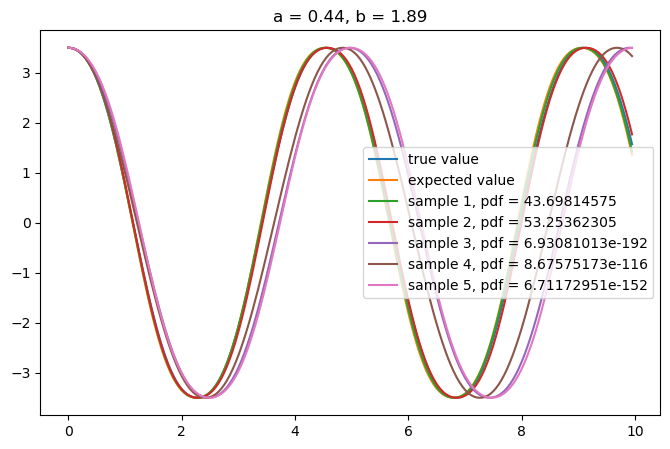

In [227]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,3.5]

a = 0.44
b = 1.89
sol = odeint(diffyqs, initial_condition, t, args=(a,b))

a_exp = vp.moments()[:,0]
b_exp = vp.moments()[:,1]

a_sample1 = 0.39
b_sample1 = 2.05

a_sample2 = 0.33
b_sample2 = 2.20

a_sample3 = 0.25
b_sample3 = 2.00

a_sample4 = 0.45
b_sample4 = 1.5

a_sample5 = 0.15
b_sample5 = 2.5

exp = odeint(diffyqs, initial_condition, t, args=(a_exp[0],b_exp[0]))
sample1 = odeint(diffyqs, initial_condition, t, args=(a_sample1 ,b_sample1))
sample2 = odeint(diffyqs, initial_condition, t, args=(a_sample2 ,b_sample2))
sample3 = odeint(diffyqs, initial_condition, t, args=(a_sample3 ,b_sample3))
sample4 = odeint(diffyqs, initial_condition, t, args=(a_sample4 ,b_sample4))
sample5 = odeint(diffyqs, initial_condition, t, args=(a_sample5 ,b_sample5))

plt.figure(figsize=(8,5))
plt.plot(t, sol[:,1], label = 'true value')
plt.plot(t, exp[:,1], label = 'expected value')
plt.plot(t, sample1[:,1], label = 'sample 1, pdf = 43.69814575')
plt.plot(t, sample2[:,1], label = 'sample 2, pdf = 53.25362305')
plt.plot(t, sample3[:,1], label = 'sample 3, pdf = 6.93081013e-192')
plt.plot(t, sample4[:,1], label = 'sample 4, pdf = 8.67575173e-116')
plt.plot(t, sample5[:,1], label = 'sample 5, pdf = 6.71172951e-152')
plt.legend()
plt.title("a = 0.44, b = 1.89")



[947.18149618]


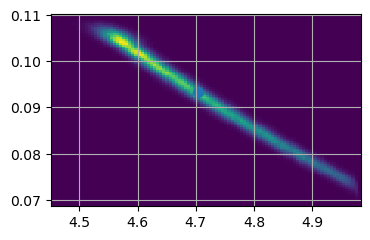

In [137]:
a = vp2.moments()[:,1]
b = vp2.moments()[:,0]

plt.figure(figsize=(4,2.5))
Xs, _ = vp2.sample(int(5e5))
plt.hist2d(Xs[:,1], Xs[:,0], bins = 100)
plt.scatter(a, b, s = 50)
plt.grid()


print(vp2.pdf([0.097, 4.650 ]))

Text(0.5, 1.0, 'a = 0.33, b = 3.22')

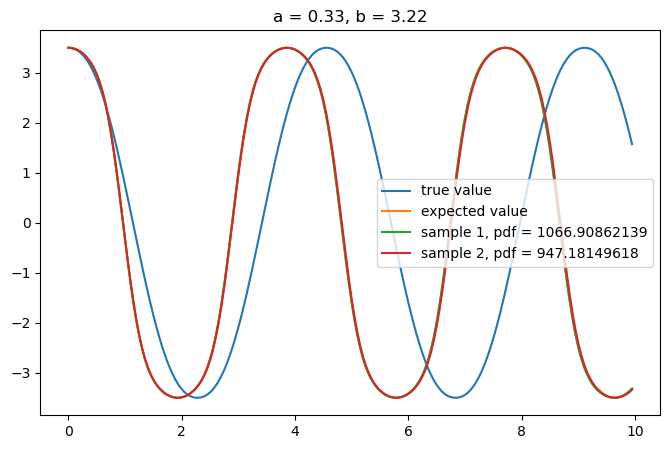

In [179]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,3.5]

a = 0.33
b = 3.22
sol2 = odeint(diffyqs, initial_condition, t, args=(a,b))

a_exp = vp2.moments()[:,0]
b_exp = vp2.moments()[:,1]

a_sample1 = 0.105
b_sample1 = 4.575

a_sample2 = 0.097
b_sample2 = 4.650

exp = odeint(diffyqs, initial_condition, t, args=(a_exp[0],b_exp[0]))
sample1 = odeint(diffyqs, initial_condition, t, args=(a_sample1 ,b_sample1))
sample2 = odeint(diffyqs, initial_condition, t, args=(a_sample2 ,b_sample2))

plt.figure(figsize=(8,5))
plt.plot(t, sol[:,1], label = 'true value')
plt.plot(t, exp[:,1], label = 'expected value')
plt.plot(t, sample1[:,1], label = 'sample 1, pdf = 1066.90862139')
plt.plot(t, sample2[:,1], label = 'sample 2, pdf = 947.18149618')
plt.legend()
plt.title("a = 0.33, b = 3.22")


[0.]


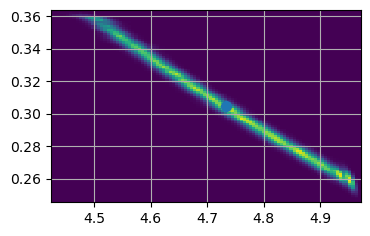

In [132]:
a = vp5.moments()[:,1]
b = vp5.moments()[:,0]

plt.figure(figsize=(4,2.5))
Xs, _ = vp5.sample(int(5e5))
plt.hist2d(Xs[:,1], Xs[:,0], bins = 100)
plt.scatter(a, b, s = 50)
plt.grid()


print(vp5.pdf([1,3]))

Text(0.5, 1.0, 'a = 0.25, b = 5.00')

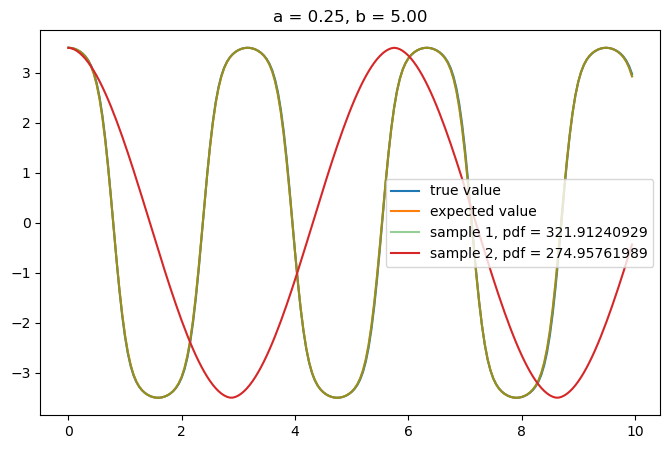

In [165]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,3.5]

a = 0.25
b = 5.00
sol5 = odeint(diffyqs, initial_condition, t, args=(a,b))

a_exp = vp5.moments()[:,0]
b_exp = vp5.moments()[:,1]

a_sample1 = 0.297
b_sample1 = 4.77


a_sample2 = 0.317
b_sample2 = 0.468

exp = odeint(diffyqs, initial_condition, t, args=(a_exp[0],b_exp[0]))
sample1 = odeint(diffyqs, initial_condition, t, args=(a_sample1 ,b_sample1))
sample2 = odeint(diffyqs, initial_condition, t, args=(a_sample2 ,b_sample2))

plt.figure(figsize=(8,5))
plt.plot(t, sol5[:,1], label = 'true value')
plt.plot(t, exp[:,1], label = 'expected value')
plt.plot(t, sample1[:,1], label = 'sample 1, pdf = 321.91240929', alpha = 0.5)
plt.plot(t, sample2[:,1], label = 'sample 2, pdf = 274.95761989')
plt.legend()
plt.title("a = 0.25, b = 5.00")


[1.12891447e-22]


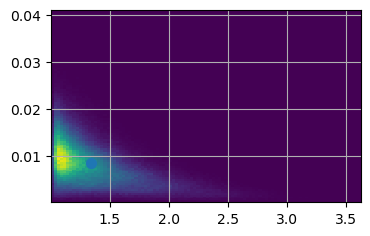

In [230]:
a = vp6.moments()[:,1]
b = vp6.moments()[:,0]

plt.figure(figsize=(4,2.5))
Xs, _ = vp6.sample(int(5e5))
plt.hist2d(Xs[:,1], Xs[:,0], bins = 100)
plt.scatter(a, b, s = 50)
plt.grid()


print(vp6.pdf([0.2,1.7]))

Text(0.5, 1.0, 'a = 0.00, b = 2.78')

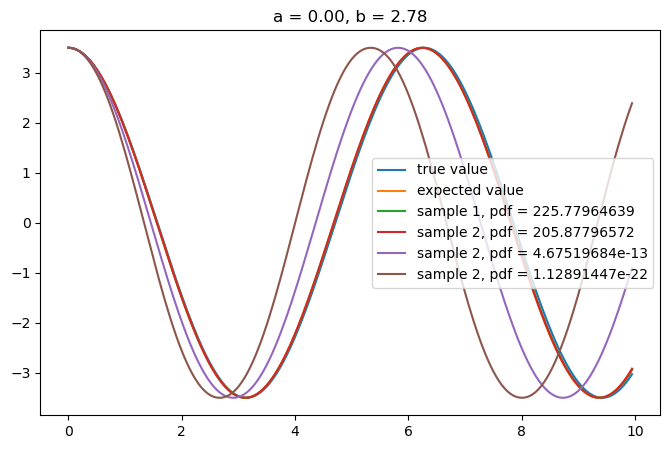

In [231]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,3.5]

a = 0.00
b = 2.78
sol6 = odeint(diffyqs, initial_condition, t, args=(a,b))

a_exp = vp6.moments()[:,0]
b_exp = vp6.moments()[:,1]

a_sample1 = 0.0085
b_sample1 = 1.1


a_sample2 = 0.011
b_sample2 = 1.05

a_sample3 = 0.1
b_sample3 = 1.5

a_sample4 = 0.2
b_sample4 = 1.7

exp = odeint(diffyqs, initial_condition, t, args=(a_exp[0],b_exp[0]))
sample1 = odeint(diffyqs, initial_condition, t, args=(a_sample1 ,b_sample1))
sample2 = odeint(diffyqs, initial_condition, t, args=(a_sample2 ,b_sample2))
sample3 = odeint(diffyqs, initial_condition, t, args=(a_sample3 ,b_sample3))
sample4 = odeint(diffyqs, initial_condition, t, args=(a_sample4 ,b_sample4))

plt.figure(figsize=(8,5))
plt.plot(t, sol6[:,1], label = 'true value')
plt.plot(t, exp[:,1], label = 'expected value')
plt.plot(t, sample1[:,1], label = 'sample 1, pdf = 225.77964639')
plt.plot(t, sample2[:,1], label = 'sample 2, pdf = 205.87796572')
plt.plot(t, sample3[:,1], label = 'sample 2, pdf = 4.67519684e-13')
plt.plot(t, sample4[:,1], label = 'sample 2, pdf = 1.12891447e-22')
plt.legend()
plt.title("a = 0.00, b = 2.78")


[68.69184654]


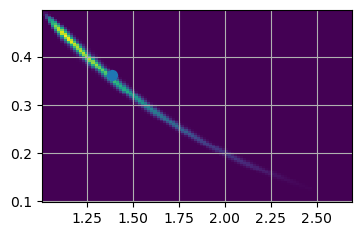

In [212]:
a = vp7.moments()[:,1]
b = vp7.moments()[:,0]

plt.figure(figsize=(4,2.5))
Xs, _ = vp7.sample(int(5e5))
plt.hist2d(Xs[:,1], Xs[:,0], bins = 100)
plt.scatter(a, b, s = 50)
plt.grid()


print(vp7.pdf([0.32,1.5]))

Text(0.5, 1.0, 'a = 0.50, b = 1.00')

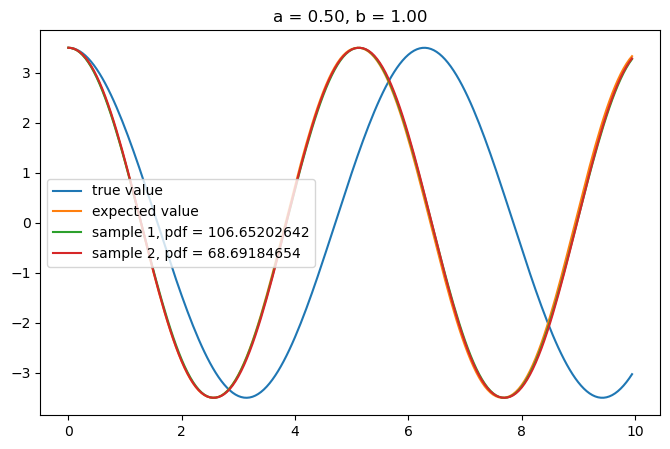

In [213]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,3.5]

a = 0.5
b = 1.0
sol7 = odeint(diffyqs, initial_condition, t, args=(a,b))

a_exp = vp7.moments()[:,0]
b_exp = vp7.moments()[:,1]

a_sample1 = 0.4
b_sample1 = 1.255


a_sample2 = 0.32
b_sample2 = 1.5

exp = odeint(diffyqs, initial_condition, t, args=(a_exp[0],b_exp[0]))
sample1 = odeint(diffyqs, initial_condition, t, args=(a_sample1 ,b_sample1))
sample2 = odeint(diffyqs, initial_condition, t, args=(a_sample2 ,b_sample2))

plt.figure(figsize=(8,5))
plt.plot(t, sol6[:,1], label = 'true value')
plt.plot(t, exp[:,1], label = 'expected value')
plt.plot(t, sample1[:,1], label = 'sample 1, pdf = 106.65202642')
plt.plot(t, sample2[:,1], label = 'sample 2, pdf = 68.69184654')
plt.legend()
plt.title("a = 0.50, b = 1.00")

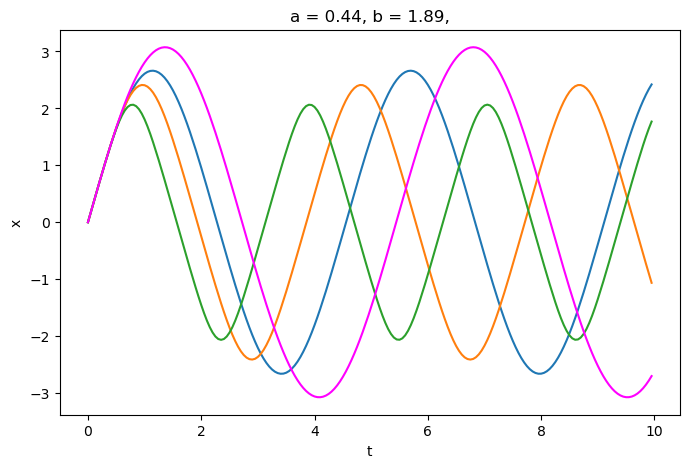

In [38]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,3.5]
# a = 0.44
# b = 1.89
# sol = odeint(diffyqs, initial_condition, t, args=(a,b))

# a = 0.33
# b = 3.22
# sol2 = odeint(diffyqs, initial_condition, t, args=(a,b))

# a = 0.5
# b = 4.11
# sol3 = odeint(diffyqs, initial_condition, t, args=(a,b))

# a = 0.22
# b = 1.44
# sol4 = odeint(diffyqs, initial_condition, t, args=(a,b))


plt.figure(figsize=(8,5))
plt.plot(t, sol[:,0], label = 'a = 9.44, b = 1.89')
#plt.plot(t, vp.moments(),) 
plt.plot(t, sol2[:,0], label = 'a = 0.33, b = 3.22')
#plt.plot(t, vp2.moments(),) 
plt.plot(t, sol3[:,0], label = 'a = 0..40, b = 4.11')
#plt.plot(t, vp3.moments(),) 
plt.plot(t, sol4[:,0], label = 'a = 0.22, b = 1.44', color = 'magenta')
#plt.plot(t, vp4.moments(),) 
plt.title('a = 0.44, b = 1.89,')
plt.xlabel('t')
plt.ylabel('x')
plt.show()


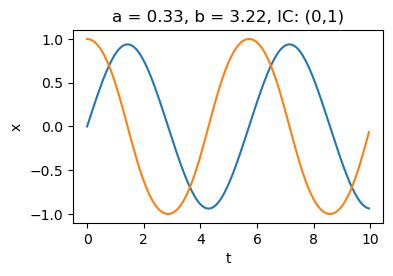

In [38]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,3.5]
a = 0.33
b = 3.22
sol = odeint(diffyqs, initial_condition, t, args=(a,b))


plt.figure(figsize=(4,2.5))
plt.plot(t, sol)
plt.title('a = 0.33, b = 3.22, IC: (0,3.5)')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

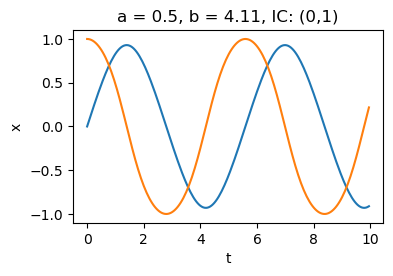

In [39]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,3.5]
a = 0.5
b = 4.11
sol = odeint(diffyqs, initial_condition, t, args=(a,b))


plt.figure(figsize=(4,2.5))
plt.plot(t, sol)
plt.title('a = 0.5, b = 4.11')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

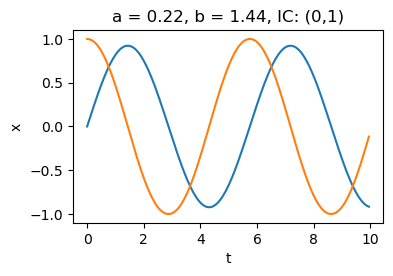

In [40]:
def diffyqs(X, t, a,b):
    x, vx = X[0], X[1]
    dx = vx
    dv = -x - np.sign(x) * a * np.abs(x)**b
    return [dx, dv]

t = np.arange(0,10,0.05)
initial_condition = [0.0,1.0]
a = 0.22
b = 1.44
sol = odeint(diffyqs, initial_condition, t, args=(a,b))


plt.figure(figsize=(4,2.5))
plt.plot(t, sol)
plt.title('a = 0.22, b = 1.44, IC: (0,1)')
plt.xlabel('t')
plt.ylabel('x')
plt.show()